

# Decision tree, Random forest and Gradient boosting

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [99]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [101]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [1271]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [1275]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

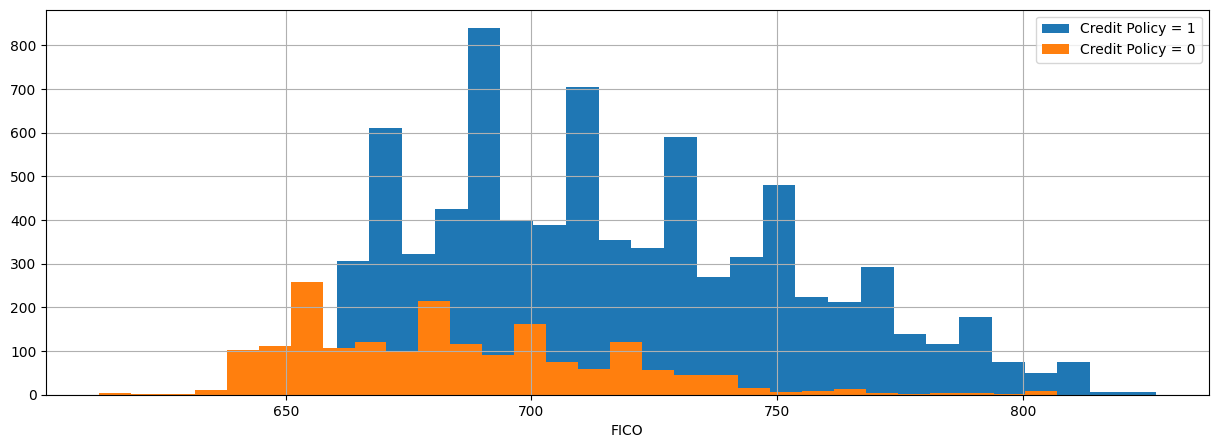

In [1398]:
plt.figure(figsize=(15,5))
loans[loans['credit.policy']==1]['fico'].hist(bins=30, label='Credit Policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(bins=30, label='Credit Policy = 0')
plt.legend()
plt.xlabel('FICO')
plt.savefig("Histficocredit")
plt.show()

** Create a similar figure, except this time select by the not.fully.paid column.**

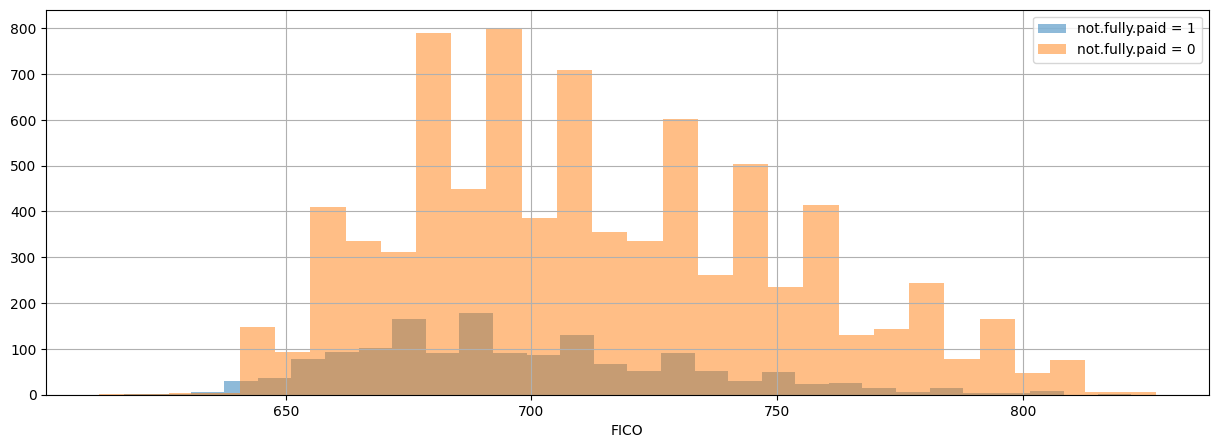

In [1400]:
plt.figure(figsize=(15,5))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha = 0.5, bins=30, label='not.fully.paid = 1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha = 0.5, bins=30, label='not.fully.paid = 0')
plt.legend()
plt.xlabel('FICO')
plt.savefig("ficopaid")
plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

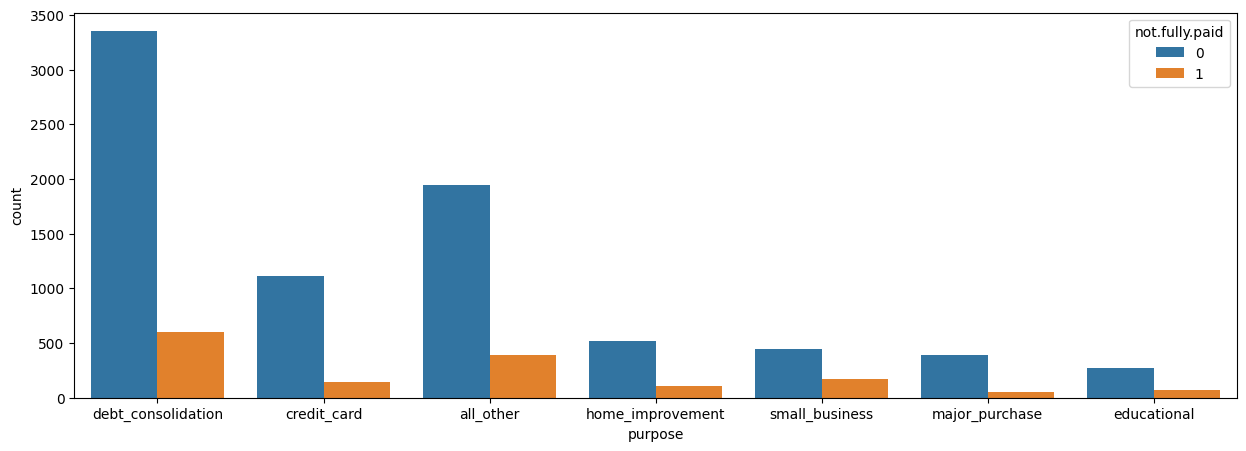

In [1281]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'purpose', data = loans, hue='not.fully.paid')
plt.show()

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

<Figure size 700x700 with 0 Axes>

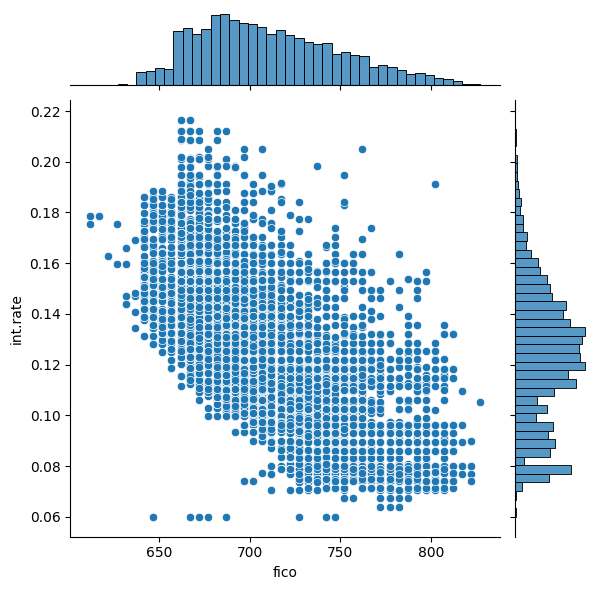

In [1283]:
plt.figure(figsize=(7,7))
sns.jointplot(data=loans, x="fico",y="int.rate")
plt.show()

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 1200x400 with 0 Axes>

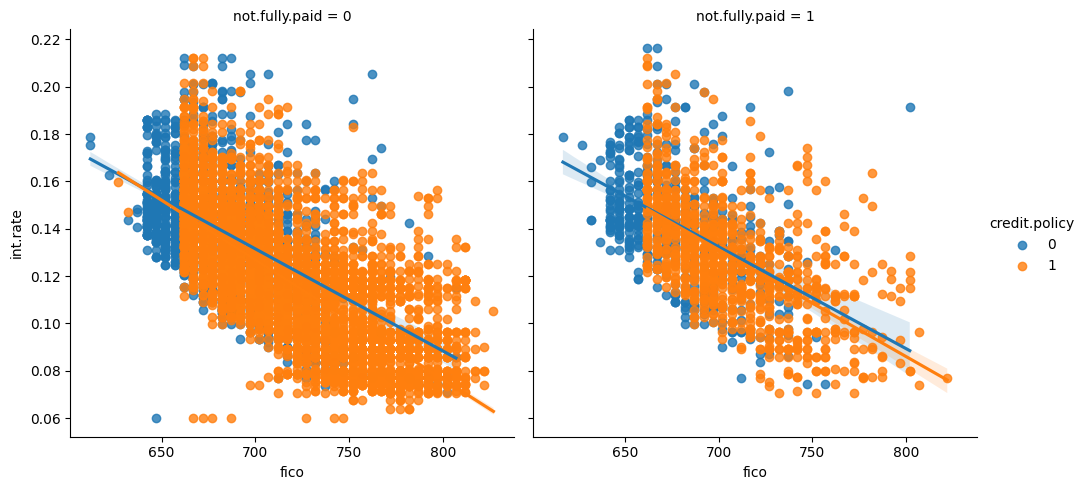

In [1285]:
plt.figure(figsize=(12,4))
sns.lmplot(data=loans,x="fico",y="int.rate",col='not.fully.paid',hue="credit.policy")
plt.show()

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [1287]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [103]:
#cat_feats = ['purpose']
cat_feats = loans.select_dtypes(include=['object','category']).columns.tolist()

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [105]:
final_data = pd.get_dummies(loans, columns = cat_feats, dtype='int', drop_first=True)

In [107]:
final_data.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [109]:
from sklearn.model_selection import train_test_split
y = final_data['not.fully.paid']
X = final_data.drop('not.fully.paid',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Training a Decision Tree Model

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training samples:

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [111]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [113]:
dtree= DecisionTreeClassifier(random_state=7)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [115]:
y_pred = dtree.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix, classification_report
print("Decision Tree Classification report")
cr = classification_report(y_test,y_pred)
print(cr)
print()
print("Decision Tree Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Decision Tree Classification report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2422
           1       0.22      0.24      0.23       452

    accuracy                           0.75      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.75      0.75      2874


Decision Tree Confusion Matrix
[[2035  387]
 [ 345  107]]


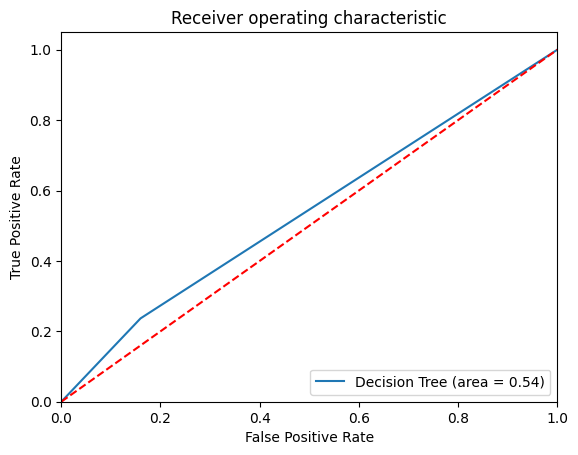

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('DT_ROC')
plt.show()

## Training the Random Forest model

Random forest is a commonly-used machine learning algorithm that combines the output of multiple decision trees to reach a single result.

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [31]:
y_pred = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [33]:
rf_cr = classification_report(y_test,y_pred)
print("Classification report for Random Forest")
print(rf_cr)
print()


Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2422
           1       0.31      0.01      0.02       452

    accuracy                           0.84      2874
   macro avg       0.58      0.50      0.47      2874
weighted avg       0.76      0.84      0.77      2874




**Show the Confusion Matrix for the predictions.**

In [35]:
rf_cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix for Random Forest")
print(rf_cm)

Confusion matrix for Random Forest
[[2411   11]
 [ 447    5]]


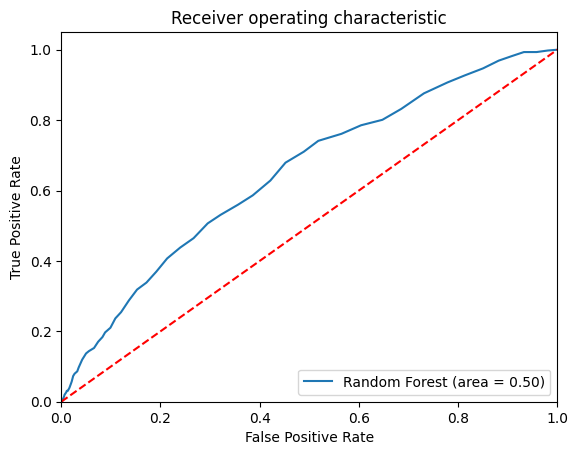

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('RF_ROC')
plt.show()

**What performed better the random forest or the decision tree?**

While the random forest performed better than decision tree for recall, f1-score of class 0 and precision of class 1, but reduced drastically for recall and f1-score of class 1. Lets try GradientBoostingClassifier.

### Training GradientBoostingClassifier

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=7)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=7)

In [43]:
y_pred = gbc.predict(X_test)
gbc_cr = classification_report(y_test,y_pred)
print("GradientBoostingClassifier Classification report")
print(gbc_cr)
print()
print("GradientBoostingClassifier confusion matrix")
gbc_cm = confusion_matrix(y_test,y_pred)
print(gbc_cm)

GradientBoostingClassifier Classification report
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2422
           1       0.38      0.03      0.05       452

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.48      2874
weighted avg       0.77      0.84      0.78      2874


GradientBoostingClassifier confusion matrix
[[2401   21]
 [ 439   13]]


GradientBoostingClassifier performance with the above parameters is almost same as RandomForestClassifier.

Distribution of burrowers not fully paid-1 and fully paid-0

In [45]:
loans['not.fully.paid'].value_counts(normalize=True)

not.fully.paid
0    0.839946
1    0.160054
Name: proportion, dtype: float64



### Improve machine learning model performance 

##### By Removing outliers

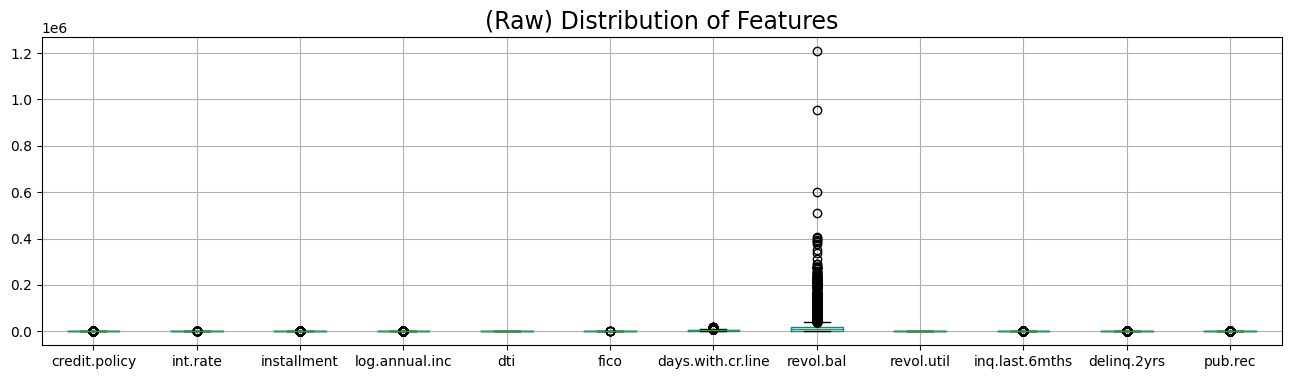

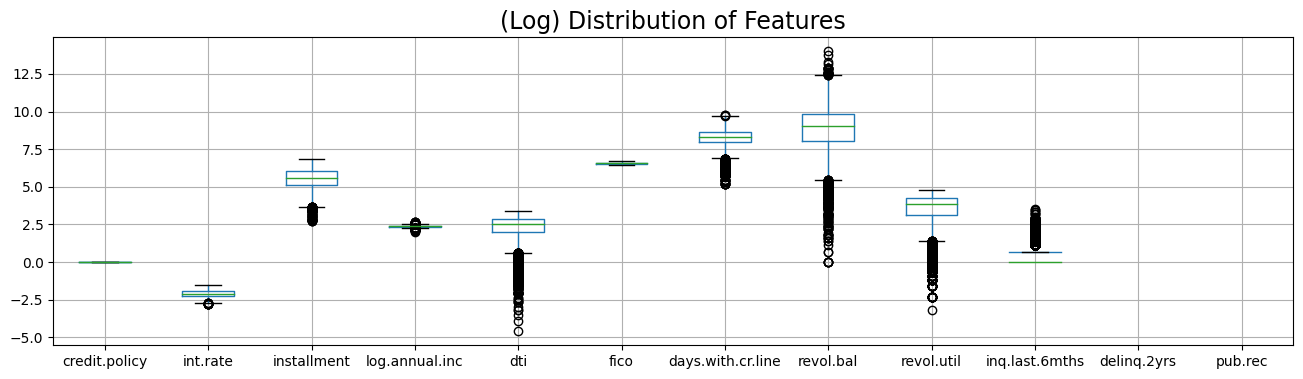

In [1331]:
df = loans.drop('purpose',axis=1)
df = df.astype('float')
plt.figure(figsize=(16,4))
df.iloc[:,:-1].boxplot()
plt.title('(Raw) Distribution of Features', fontsize=17)
plt.show()

plt.figure(figsize=(16,4))
np.log(df.iloc[:,:-1]).boxplot()
plt.title('(Log) Distribution of Features', fontsize=17)
plt.show()

Looks like revolving balance column has outliers. Let's check the distribution.

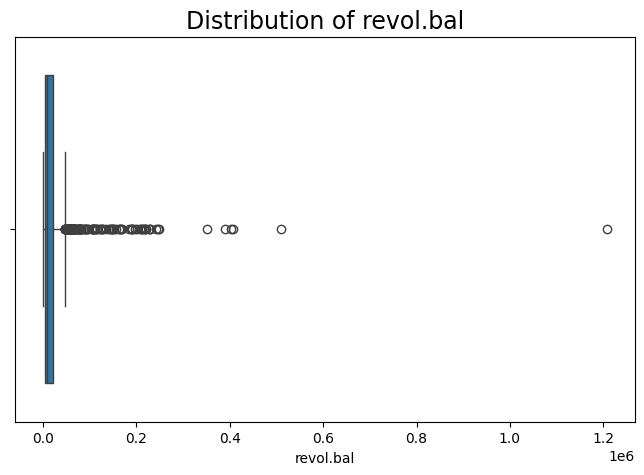

<Figure size 800x500 with 0 Axes>

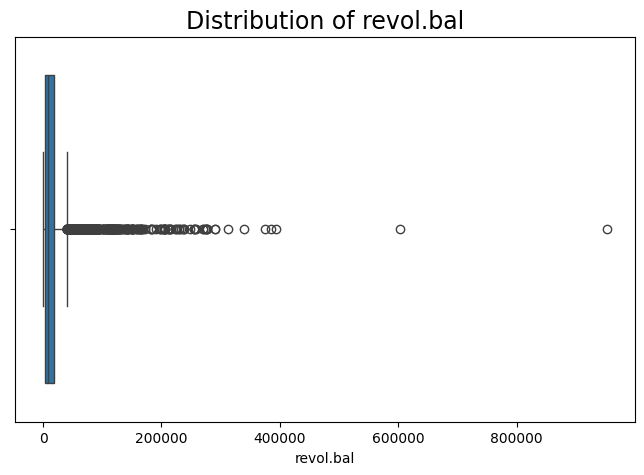

In [48]:
#loans.isnull().sum()
#Now look The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle) for burrowers not paid in full
plt.figure(figsize=(8,5))
sns.boxplot(x=loans['revol.bal'][loans['not.fully.paid'] == 1])
plt.title('Distribution of revol.bal',fontsize=17)
plt.show()
##Now look The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle) for burrowers paid in full
plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.boxplot(x=loans['revol.bal'][loans['not.fully.paid'] == 0])
plt.title('Distribution of revol.bal',fontsize=17)
plt.show()

In [50]:
loans.shape

(9578, 14)

In [121]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [123]:
def remove_outliers(df, columns):
    # Create a mask to filter out outliers
    mask = pd.Series([True] * len(df))
    
    for column in columns:
        outliers = find_outliers_IQR(df[column])
        # Update the mask to exclude rows with outliers in the specified column
        mask &= ~df[column].isin(outliers)
    
    # Apply the mask to the DataFrame to filter out rows with outliers
    df_cleaned = df[mask].reset_index(drop=True)
    
    return df_cleaned

# Define the columns to check for outliers
columns_to_check = ["int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", "revol.util"]

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(loans, columns_to_check)

# Print the shape of the cleaned DataFrame
print(f"Original DataFrame shape: {loans.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (9578, 14)
Cleaned DataFrame shape: (8158, 14)


In [127]:
# loans[loans['revol.bal']>500000]
#df_cleaned[df_cleaned['revol.bal']>500000]

In [1337]:
#loans = loans[loans['revol.bal']<500000]

##### One Hot Encoding

In [129]:
cat_cols = df_cleaned.select_dtypes(include=('object','category')).columns.tolist()
  #loans.dtypes.isin(["object", "category"])#   
cat_cols

['purpose']

In [131]:
loans_dum = pd.get_dummies(df_cleaned, columns=cat_cols,dtype='int',drop_first=True)

In [62]:
loans_dum.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0


In [133]:
X = loans_dum.loc[:, loans_dum.columns != 'not.fully.paid']
y = loans_dum.loc[:, loans_dum.columns == 'not.fully.paid']

In [135]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
X['scaled_revol.bal'] = rob_scaler.fit_transform(loans_dum['revol.bal'].values.reshape(-1,1))

In [1349]:
X.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,scaled_revol.bal
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0,1.348983
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0,1.666339


In [137]:
X['days.with.cr.line'] = X['days.with.cr.line'].astype('int32')
X['credit.policy'] = X['credit.policy'].astype('int16')
X = X.drop('revol.bal', axis=1)
X = X.round(2)

In [139]:
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X, y, test_size=0.3, random_state=7)

##### 
Standardizing Data

In [141]:
from sklearn.preprocessing import StandardScaler  
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_cl_train)

# Transform the test data
X_test_scaled = scaler.transform(X_cl_test)
#Standardization transforms the data to have a mean of 0 and a standard deviation of 1

Standardization transforms the data to have a mean of 0 and a standard deviation of 1
##### Decision Tree Model Standardized X

In [205]:
DT_cl= DecisionTreeClassifier(random_state=7)
DT_cl.fit(X_train_scaled, y_cl_train)
dt_cl_pred = DT_cl.predict(X_test_scaled)
print("Confusion Matrix")
print(confusion_matrix(y_cl_test,dt_cl_pred))
print()
print("Classification Report")
print(classification_report(y_cl_test,dt_cl_pred))

Confusion Matrix
[[1718  381]
 [ 264   85]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2099
           1       0.18      0.24      0.21       349

    accuracy                           0.74      2448
   macro avg       0.52      0.53      0.53      2448
weighted avg       0.77      0.74      0.75      2448



In [211]:
round(y.value_counts(normalize=True)*100,2)

not.fully.paid
0                 84.8
1                 15.2
Name: proportion, dtype: float64

#### Dataset is imbalanced.

### Increasing performance of Imbanced Datasets
#### Method 1 
### Over-sampling using SMOTE(Synthetic Minority Oversampling Technique)

In [161]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
columns = X_train.columns
smo_X,smo_y=smo.fit_resample(X_train, y_train)
smo_X = pd.DataFrame(data=smo_X,columns=columns )
smo_y= pd.DataFrame(data=smo_y,columns=['not.fully.paid'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(smo_X))
print("Number of burrowers fully paid",len(smo_y[smo_y['not.fully.paid']==0]))
print("Number of burrowers not fully paid",len(smo_y[smo_y['not.fully.paid']==1]))
print("Proportion of burrowers fully paid in oversampled data is ",len(smo_y[smo_y['not.fully.paid']==0])/len(smo_X))
print("Proportion of burrowers not fully paid in oversampled data is ",len(smo_y[smo_y['not.fully.paid']==1])/len(smo_X))

length of oversampled data is  12444
Number of burrowers fully paid 6222
Number of burrowers not fully paid 6222
Proportion of burrowers fully paid in oversampled data is  0.5
Proportion of burrowers not fully paid in oversampled data is  0.5


In [163]:
import statsmodels.api as sm
logit_model=sm.Logit(smo_y, smo_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.508959
         Iterations 6
                              Results: Logit
Model:                  Logit               Method:              MLE       
Dependent Variable:     not.fully.paid      Pseudo R-squared:    0.266     
Date:                   2024-10-07 11:37    AIC:                 12702.9735
No. Observations:       12444               BIC:                 12836.6954
Df Model:               17                  Log-Likelihood:      -6333.5   
Df Residuals:           12426               LL-Null:             -8625.5   
Converged:              1.0000              LLR p-value:         0.0000    
No. Iterations:         6.0000              Scale:               1.0000    
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
credit.policy    

In [214]:
X_train, X_test, y_train, y_test = train_test_split(smo_X, smo_y, test_size=0.3, random_state=7)
DT= DecisionTreeClassifier(random_state=7)
DT.fit(X_train, y_train)
#DT.fit(smo_X, smo_y)
DT.feature_importances_
y_pred = DT.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)

[[1512  372]
 [ 325 1525]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1884
           1       0.80      0.82      0.81      1850

    accuracy                           0.81      3734
   macro avg       0.81      0.81      0.81      3734
weighted avg       0.81      0.81      0.81      3734



<Axes: >

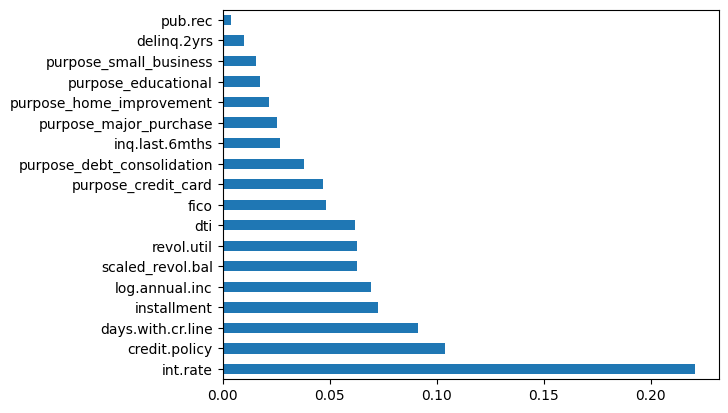

In [216]:
feat_importances = pd.Series(DT.feature_importances_, index=X_train.columns)
feat_importances.nlargest(18).plot(kind='barh')

#### Method 2
### Use Ensemble Cross-Validation (CV)

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 7)

rdf = RandomForestClassifier(random_state = 7) 
params = {'max_depth': [5,7,10], 
              'min_samples_split': [5, 10, 12],
              'min_samples_leaf' : [2,3,4],
              'n_estimators' : [300, 400, 500],
              'criterion' : ['gini', 'entropy']
             }

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [5, 10, 12],
                         'n_estimators': [300, 400, 500]},
             verbose=4)

In [173]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400, random_state=7)
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}


In [183]:
rfc_best = RandomForestClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 400, criterion='gini',random_state=7)
rfc_best.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400, random_state=7)

In [185]:
y_pred = rfc_best.predict(X_test)
rfc_best_cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix of Random Forest Classifier with Grid Search")
print(rfc_best_cm)
print()
print("Classification Report of Random Forest Classifier with Grid Search")
rfc_best_cr = classification_report(y_test,y_pred)
print(rfc_best_cr)

Confusion Matrix of Random Forest Classifier with Grid Search
[[1573  311]
 [ 353 1497]]

Classification Report of Random Forest Classifier with Grid Search
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1884
           1       0.83      0.81      0.82      1850

    accuracy                           0.82      3734
   macro avg       0.82      0.82      0.82      3734
weighted avg       0.82      0.82      0.82      3734



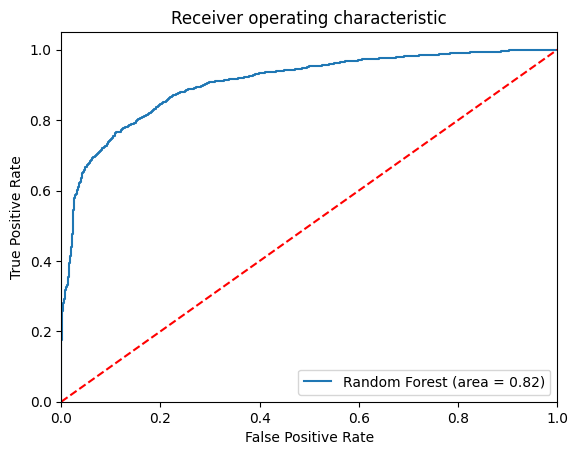

In [187]:
rf_roc_auc = roc_auc_score(y_test, rfc_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

#### Method 3
### Set Class Weight/Importance

In [189]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 7)

class_weight = dict({0:2, 1:40})
dtc = DecisionTreeClassifier(random_state = 7,class_weight=class_weight) 
params = {'max_depth': [8, 10, 20], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf' : [2,4,6]
             }
grid_clf = GridSearchCV(estimator = dtc, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight={0: 2, 1: 40},
                                              random_state=7),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 20],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 5, 10]},
             verbose=4)

In [191]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

DecisionTreeClassifier(class_weight={0: 2, 1: 40}, max_depth=20,
                       min_samples_leaf=2, random_state=7)
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [197]:
dtc1 = DecisionTreeClassifier(class_weight={0: 1, 1: 30},  max_depth=20,
                       min_samples_leaf=2, min_samples_split=2,random_state=7)
dtc1.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight={0: 1, 1: 30}, max_depth=20,
                       min_samples_leaf=2, random_state=7)

In [199]:
y_pred = dtc1.predict(X_test)
dtc1_best_cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix of Decision Tree Classifier with Grid Search and class weight")
print(dtc1_best_cm)
print()
print("Classification Report of Decision Tree Classifier with Grid Search and class weight")
dtc1_best_cr = classification_report(y_test,y_pred)
print(dtc1_best_cr)

Confusion Matrix of Decision Tree Classifier with Grid Search and class weight
[[ 884 1000]
 [ 140 1710]]

Classification Report of Decision Tree Classifier with Grid Search and class weight
              precision    recall  f1-score   support

           0       0.86      0.47      0.61      1884
           1       0.63      0.92      0.75      1850

    accuracy                           0.69      3734
   macro avg       0.75      0.70      0.68      3734
weighted avg       0.75      0.69      0.68      3734



The best results so far for class 0 as well as class 1 are by first using SMOTE to oversample the 1 class and then use Ensemble Cross-Validation with RandomForestClassifier as the model. There are many scopes to improve the model further. For example, deleting unnecessary features and adding some extra features by engineering. Have to try LightGBM and XgBoost as well.